# TRTR and TSTR Results Comparison

In [1]:
#import libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt

pd.set_option('display.precision', 4)

In [4]:
os.chdir("c:\\Users\\27261\\Desktop\\prostate\\code-0126\\RESULTS")

## 1. Create empty dataset to save metrics differences

In [5]:
DATA_TYPES = ['Real','GM','SDV-FML','CTGAN','WGANGP']
SYNTHESIZERS = ['GM','SDV-FML','CTGAN','WGANGP']
ml_models = ['RF','KNN','DT','SVM','MLP']

## 2. Read obtained results when TRTR and TSTR

In [12]:
FILEPATHS = {'Real' : 'models_results_real.csv',
            'GM' : 'models_results_gm.csv',
            'SDV-FML' : 'models_results_sdv_fml.csv',
            'CTGAN' : 'models_results_ctgan.csv',
            'WGANGP' : 'models_results_wgangp.csv'}

In [13]:
#iterate over all datasets filepaths and read each dataset
results_all = dict()
for name, path in FILEPATHS.items() :
    results_all[name] = pd.read_csv(path, index_col='model')
results_all

{'Real':        accuracy  precision  recall      f1
 model                                     
 RF       0.8983     0.8818  0.8983  0.8798
 KNN      0.8644     0.7750  0.8644  0.8173
 DT       0.7119     0.8004  0.7119  0.7495
 SVM      0.6949     0.8402  0.6949  0.7454
 MLP      0.8644     0.8472  0.8644  0.8544,
 'GM':        accuracy  precision  recall      f1
 model                                     
 RF       0.8814     0.7768  0.8814  0.8258
 KNN      0.8644     0.7750  0.8644  0.8173
 DT       0.7966     0.7966  0.7966  0.7966
 SVM      0.7966     0.7671  0.7966  0.7816
 MLP      0.6780     0.7723  0.6780  0.7200,
 'SDV-FML':        accuracy  precision  recall      f1
 model                                     
 RF       0.8814     0.7768  0.8814  0.8258
 KNN      0.8814     0.7768  0.8814  0.8258
 DT       0.7797     0.8152  0.7797  0.7958
 SVM      0.1186     0.0141  0.1186  0.0252
 MLP      0.8814     0.7768  0.8814  0.8258,
 'CTGAN':        accuracy  precision  recall    

## 3. Calculate differences of models

In [14]:
metrics_diffs_all = dict()
real_metrics = results_all['Real']
columns = ['data','accuracy_diff','precision_diff','recall_diff','f1_diff']
metrics = ['accuracy','precision','recall','f1']

for name in SYNTHESIZERS:
    syn_metrics = results_all[name]
    # 初始化一个空的列表来收集该 synthesizer 的所有数据行
    all_data_rows = []
    
    for model in ml_models:
        real_metrics_model = real_metrics.loc[model]
        syn_metrics_model = syn_metrics.loc[model]
        data_row = [model]  # 开始收集该行的数据，首先是模型名称
        for m in metrics:
            # 计算每个指标的差异并收集
            data_row.append(abs(real_metrics_model[m] - syn_metrics_model[m]))
        # 将完整的数据行添加到 all_data_rows 列表
        all_data_rows.append(data_row)
    
    # 循环结束后，使用 pd.concat 一次性将所有数据行添加到 DataFrame
    metrics_diffs_all[name] = pd.DataFrame(all_data_rows, columns=columns)

metrics_diffs_all

{'GM':   data  accuracy_diff  precision_diff  recall_diff  f1_diff
 0   RF         0.0169          0.1050       0.0169   0.0540
 1  KNN         0.0000          0.0000       0.0000   0.0000
 2   DT         0.0847          0.0038       0.0847   0.0471
 3  SVM         0.1017          0.0731       0.1017   0.0362
 4  MLP         0.1864          0.0749       0.1864   0.1344,
 'SDV-FML':   data  accuracy_diff  precision_diff  recall_diff  f1_diff
 0   RF         0.0169          0.1050       0.0169   0.0540
 1  KNN         0.0170          0.0018       0.0170   0.0085
 2   DT         0.0678          0.0148       0.0678   0.0463
 3  SVM         0.5763          0.8261       0.5763   0.7202
 4  MLP         0.0170          0.0704       0.0170   0.0286,
 'CTGAN':   data  accuracy_diff  precision_diff  recall_diff  f1_diff
 0   RF         0.0169          0.1050       0.0169   0.0540
 1  KNN         0.0000          0.0000       0.0000   0.0000
 2   DT         0.0509          0.0116       0.0509   0.0

## 4. Compare absolute differences

### 4.1. Barplots for each metric

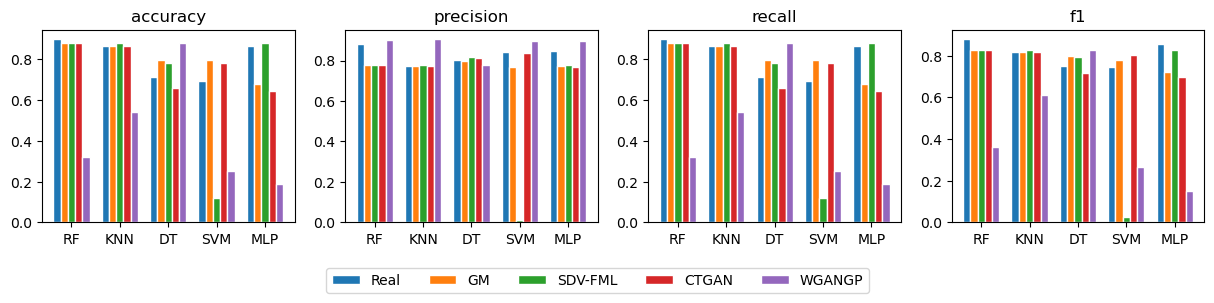

In [21]:
metrics = ['accuracy', 'precision', 'recall', 'f1']
metrics_diff = ['accuracy_diff', 'precision_diff', 'recall_diff', 'f1_diff']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

barwidth = 0.15

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(15, 2.5))
axs_idxs = range(4)
idx = dict(zip(metrics + metrics_diff,axs_idxs))

for i in range(0,len(metrics)) :
    data = dict()
    y_pos = dict()
    y_pos[0] = np.arange(len(ml_models))
    ax = axs[idx[metrics[i]]]
    
    for k in range(0,len(DATA_TYPES)) :
        generator_data = results_all[DATA_TYPES[k]] 
        data[k] = [0, 0, 0, 0, 0]
        
        for p in range(0,len(ml_models)) :
            data[k][p] = generator_data[metrics[i]].iloc[p]
            
        ax.bar(y_pos[k], data[k], color=colors[k], width=barwidth, edgecolor='white', label=DATA_TYPES[k])
        y_pos[k+1] = [x + barwidth for x in y_pos[k]]
        
    ax.set_xticks([r + barwidth*2 for r in range(len(ml_models))])
    ax.set_xticklabels([])
    ax.set_xticklabels(ml_models, fontsize=10)
    ax.set_title(metrics[i], fontsize=12)
    
ax.legend(DATA_TYPES, ncol=5, bbox_to_anchor=(-0.3, -0.2))
fig.tight_layout()
# fig.suptitle('Models performance comparisson Boxplots (TRTR and TSTR) \n Dataset about prostate cancer', fontsize=18)
fig.savefig('MODELS_METRICS_BARPLOTS.svg', bbox_inches='tight')

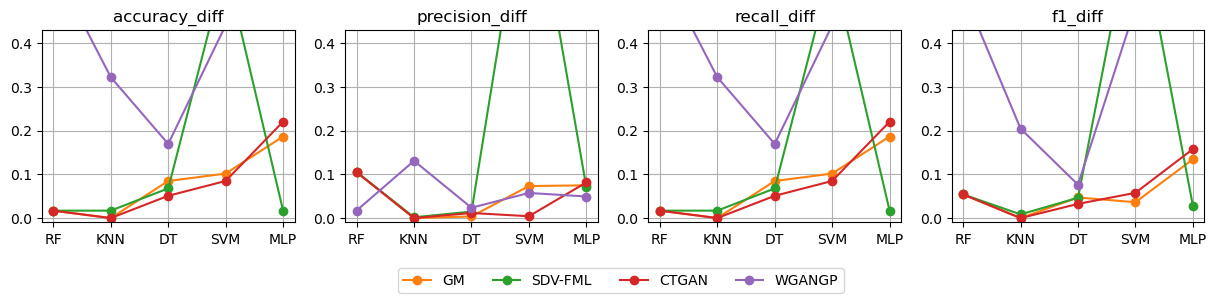

In [22]:
metrics = ['accuracy_diff', 'precision_diff', 'recall_diff', 'f1_diff']
colors = ['tab:orange', 'tab:green', 'tab:red', 'tab:purple']

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(15,2.5))
axs_idxs = range(4)
idx = dict(zip(metrics,axs_idxs))

for i in range(0,len(metrics)) :
    data = dict()
    ax = axs[idx[metrics[i]]]
    
    for k in range(0,len(SYNTHESIZERS)) :
        generator_data = metrics_diffs_all[SYNTHESIZERS[k]] 
        data[k] = [0, 0, 0, 0, 0]
        
        for p in range(0,len(ml_models)) :
            data[k][p] = generator_data[metrics[i]].iloc[p]
            
        ax.plot(data[k], 'o-', color=colors[k], label=SYNTHESIZERS[k])
        
    ax.set_xticks(np.arange(len(ml_models)))
    ax.set_xticklabels(ml_models, fontsize=10)
    ax.set_title(metrics[i], fontsize=12)
    ax.set_ylim(bottom=-0.01, top=0.43)
    ax.grid()
    
ax.legend(SYNTHESIZERS, ncol=5, bbox_to_anchor=(-0.4, -0.2))
fig.tight_layout()
# fig.suptitle('Models performance comparisson Boxplots (TRTR and TSTR) \n Dataset about prostate cancer', fontsize=18)
fig.savefig('MODELS_METRICS_DIFFERENCES.svg', bbox_inches='tight')